# Mixture of Gaussian
## Definition

Gaussian is a unimodal distribution. It has only one peak. For achiving multimodal distribution, we can mix a number of Gaussians. We therefore consider a superposition of $K$ Gaussian densities of the form
$$p(\mathbf{x})=\sum_{k=1}^K\pi_{k}\mathcal{N}(\mathbf{x}|\mathbf{\mu}_k,\Sigma_k)$$
where we have $K$ different Gaussian distribution as components, and the weights of these components is denoted by $\pi_k$, which is also called *mixing coefficients*. These coefficient should satisfy
$$\sum_{k=1}^K\pi_k=1, \quad \pi_k\geq 0$$
in order to make the integration of the mixture of Gaussian to be $1$.

## Bayes' theorem
From the Bayesian view, the mixture distribution can be seen having the form
$$p(\mathbf{x})=\sum_{k=1}^Kp(k)p(\mathbf{x}|k)$$
where 
- $p(k) = \pi_k$, as the prior probability of picking the $k^{th}$ component.
- $p(\mathbf{x}|k)=\mathcal{N}(\mathbf{x}|\mathbf{\mu}_k,\Sigma_k)$, se the probability of $\mathbf{x}$ conditioned on $k$.

Then the posterior is given by
$$\begin{align*}
\gamma_k(\mathbf{x})&\equiv p(k|\mathbf{x})\\
&=\frac{p(k)p(\mathbf{x}|k)}{\sum_l p(l)p(\mathbf{x}|l)}\\
&=\frac{\pi_k\mathcal{N}(\mathbf{x}|\mathbf{\mu}_k,\Sigma_k)}{\sum_l \pi_l\mathcal{N}(\mathbf{x}|\mathbf{\mu}_l,\Sigma_l)}
\end{align*}$$
We shall discuss the probabilistic interpretation of the mixture distribution in greater detail in Chapter 9.

## Likelihood function
The log likelihood function is given by
$$\ln p(\mathbf{X}|\mathbf{\pi}, \mathbf{\mathbf{\mu}},\Sigma)=\sum_{n=1}^N\ln\left\{\sum_{k=1}^K\pi_k\mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k, \Sigma_k)\right\}$$
where $\mathbf{X}=\left\{\mathbf{x}_1,\cdots,\mathbf{x}_n\right\}$ denotes the observations. Due to the presence of the summation over $k$ inside the logarithm, the maximum likelihood solution for the parameters no longer has a closed-form analytical solution. One approach is to use iterative numerical optimization techniques.

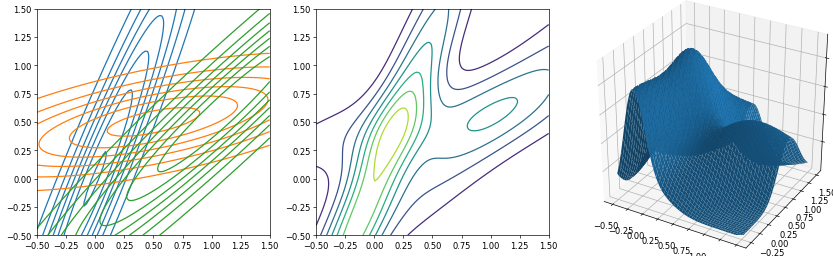

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA

D = 2

MU1 = [0.0, 0.0]
MU2 = [0.5, 0.5]
MU3 = [1.1, 0.6]

S1  = [[0.3, 0.7],
       [0.7, 1.8]]
S2  = [[1.0, 0.2],
       [0.2, 0.1]]
S3  = [[1.2, 1.1],
       [1.1, 1.1]]

k1  = 0.5
k2  = 0.2
k3  = 0.3

gaussian = lambda x, mu, s: 1.0/((2.0*np.pi)**(D/2)) * \
               1.0/(LA.det(s)**.5) * \
                np.exp(-.5 * \
                   np.matmul( \
                       np.matmul((x-mu).reshape(1,D), (LA.inv(s))), \
                       (x-mu).reshape(D,1)))

def Gaussian_plane(arr, m, s):
    arr1 = arr.reshape(-1, arr.shape[-1])
    arr2 = []
    for e in arr1:
        arr2.append(gaussian(e, m, s))
    return np.array(arr2)

def main():
    fig = plt.figure(figsize=(17,5), dpi=60)
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3, projection='3d')
    X,Y = np.mgrid[-.5:1.5:100j, -.5:1.5:100j]
    arr = []
    for i in range(len(X)):
        arr.append(np.transpose([X[i],Y[i]]))
    Arr = np.array(arr)
    
    Z1 = Gaussian_plane(Arr, MU1, S1).reshape(X.shape)
    ax1.contour(X, Y, Z1, colors=['C0'])
    Z2 = Gaussian_plane(Arr, MU2, S2).reshape(X.shape)
    ax1.contour(X, Y, Z2, colors=['C1'])
    Z3 = Gaussian_plane(Arr, MU3, S3).reshape(X.shape)
    ax1.contour(X, Y, Z3, colors=['C2'])
    
    Z = k1*Z1+k2*Z2+k3*Z3
    ax2.contour(X, Y, Z)
    
    ax3.plot_surface(X, Y, Z)
    ax3.dist = 8
    plt.show()
    
if __name__=="__main__":
    main()